## Binh and Korn function 

Problem taken from \[Binh T. and Korn U. (1997) MOBES: A Multiobjective Evolution Strategy for Constrained Optimization Problems. In: Proceedings of the Third International Conference on Genetic Algorithms. Czech Republic. pp. 176–182\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 4x_1^2+4x_2^2$

$f_2 (x_1,x_2) = (x_1 - 5)^2+(x_2-5)^2$

*subjected to*

$(x_1 - 5)^2+x_2^2 \le 25$

$(x_1 - 8)^2+(x_2+3)^2 \ge 7.7$

*in the domain*

$0 \le x_1 \le 5$

$0 \le x_2 \le 3$

In [1]:
from mosa import Anneal
from math import inf
from time import time
%matplotlib inline

### Translates the Binh and Korn problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the objective functions to be minimized. The argument of the Python function is a dictionary with two keys, $X_1$ and $X_2$, representing a trial solution to the problem. The constraints are defined as $c_1$ and $c_2$. If they are not fulfilled, infinity is assigned to $f_1$ and $f_2$.

In [2]:
def fobj(solution):
    f1=4.0*(pow(solution["X1"],2)+pow(solution["X2"],2))
    f2=pow((solution["X1"]-5),2)+pow((solution["X2"]-5),2)
    c1=pow((solution["X1"]-5),2)+pow((solution["X2"]),2)
    c2=pow((solution["X1"]-8),2)+pow((solution["X2"]+3),2)

    if c1>25.0 or c2<7.7:
        f1=inf
        f2=inf
    
    return f1,f2

### Initialization

First, an *Anneal* object is created.

Then, a population is defined. The population is a dictionary and its keys are the keys that will be present in the trial solutions to the problem. In the case of the Binh and Korn problem, we used two keys, $X_1$ and $X_2$. Since the solution space is continuous for $X_1$ and $X_2$ in the domain defined above, tuples containing two values (i.e., the lower and upper bounds) are assigned to these keys.

In [3]:
opt=Anneal()
opt.archive_size=10000
opt.maximum_archive_rejections=10000

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    




In [4]:
opt.population={"X1":(0.0,5.0),"X2":(0.0,3.0)}

### Hot run

A first run starting at very high temperatures (1000.0) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

In [5]:
opt.initial_temperature=1000.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X1":1,"X2":1}
opt.mc_step_size={"X1":0.5,"X2":0.3}

In [6]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['X1']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,5.0)
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.500000
    ['X2']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,3.0)
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probab

    Number of accepted moves: 974.
    Fraction of accepted moves: 0.974000.
    Number of archive updates: 58.
    Fraction of archive updates in accepted moves: 0.059548.
------
TEMPERATURE: 166.083384
    Number of accepted moves: 957.
    Fraction of accepted moves: 0.957000.
    Number of archive updates: 63.
    Fraction of archive updates in accepted moves: 0.065831.
------
TEMPERATURE: 157.779215
    Number of accepted moves: 969.
    Fraction of accepted moves: 0.969000.
    Number of archive updates: 63.
    Fraction of archive updates in accepted moves: 0.065015.
------
TEMPERATURE: 149.890254
    Number of accepted moves: 945.
    Fraction of accepted moves: 0.945000.
    Number of archive updates: 48.
    Fraction of archive updates in accepted moves: 0.050794.
------
TEMPERATURE: 142.395741
    Number of accepted moves: 966.
    Fraction of accepted moves: 0.966000.
    Number of archive updates: 35.
    Fraction of archive updates in accepted moves: 0.036232.
------
TEMP

    Number of accepted moves: 886.
    Fraction of accepted moves: 0.886000.
    Number of archive updates: 54.
    Fraction of archive updates in accepted moves: 0.060948.
------
TEMPERATURE: 20.276547
    Number of accepted moves: 887.
    Fraction of accepted moves: 0.887000.
    Number of archive updates: 32.
    Fraction of archive updates in accepted moves: 0.036077.
------
TEMPERATURE: 19.262720
    Number of accepted moves: 855.
    Fraction of accepted moves: 0.855000.
    Number of archive updates: 55.
    Fraction of archive updates in accepted moves: 0.064327.
------
TEMPERATURE: 18.299584
    Number of accepted moves: 846.
    Fraction of accepted moves: 0.846000.
    Number of archive updates: 71.
    Fraction of archive updates in accepted moves: 0.083924.
------
TEMPERATURE: 17.384605
    Number of accepted moves: 848.
    Fraction of accepted moves: 0.848000.
    Number of archive updates: 59.
    Fraction of archive updates in accepted moves: 0.069575.
------
TEMPERAT

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front.

Solutions produced by the "hot run" were taken from the archive.

In [7]:
opt.initial_temperature=1.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X1":1,"X2":1}
opt.mc_step_size={"X1":0.05,"X2":0.03}

In [8]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------
Keys in the population/solution dictionaries:
    ['X1']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,5.0)
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.050000
    ['X2']:
        Number of elements in the solution: 1
        Continuous sampling space
        Boundaries: (0.0,3.0)
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choos

    Number of accepted moves: 433.
    Fraction of accepted moves: 0.433000.
    Number of archive updates: 81.
    Fraction of archive updates in accepted moves: 0.187067.
------
TEMPERATURE: 0.157779
    Number of accepted moves: 414.
    Fraction of accepted moves: 0.414000.
    Number of archive updates: 36.
    Fraction of archive updates in accepted moves: 0.086957.
------
TEMPERATURE: 0.149890
    Number of accepted moves: 417.
    Fraction of accepted moves: 0.417000.
    Number of archive updates: 47.
    Fraction of archive updates in accepted moves: 0.112710.
------
TEMPERATURE: 0.142396
    Number of accepted moves: 414.
    Fraction of accepted moves: 0.414000.
    Number of archive updates: 45.
    Fraction of archive updates in accepted moves: 0.108696.
------
TEMPERATURE: 0.135276
    Number of accepted moves: 394.
    Fraction of accepted moves: 0.394000.
    Number of archive updates: 11.
    Fraction of archive updates in accepted moves: 0.027919.
------
TEMPERATURE:

### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [9]:
pruned=opt.prunedominated()
opt.printx(pruned)

===
Solutions:
1) {'X1': 1.3817998924222485, 'X2': 1.4058769100280202}
2) {'X1': 1.1848519515501246, 'X2': 1.2190482733135837}
3) {'X1': 0.2137932361543584, 'X2': 0.1670111522285034}
4) {'X1': 0.5690904258568202, 'X2': 0.5727179465408097}
5) {'X1': 0.5685717792748923, 'X2': 0.5467966471338903}
6) {'X1': 0.5685717792748923, 'X2': 0.6427382912619837}
7) {'X1': 0.8108413258571648, 'X2': 0.8443130161520193}
8) {'X1': 0.5679582776221175, 'X2': 0.5348358441770582}
9) {'X1': 0.4681028825379824, 'X2': 0.5348358441770582}
10) {'X1': 0.46377259948922067, 'X2': 0.4282673364716563}
11) {'X1': 1.0271852073446772, 'X2': 1.0481501596170326}
12) {'X1': 1.0271852073446772, 'X2': 1.0308798173319633}
13) {'X1': 3.4620474803815604, 'X2': 2.972436819299686}
14) {'X1': 3.121989017339902, 'X2': 2.972436819299686}
15) {'X1': 2.7091247692968103, 'X2': 2.760291711860072}
16) {'X1': 2.1567834637317884, 'X2': 2.1481629499779973}
17) {'X1': 2.7115295147686176, 'X2': 2.722807836652207}
18) {'X1': 2.9918116586245445

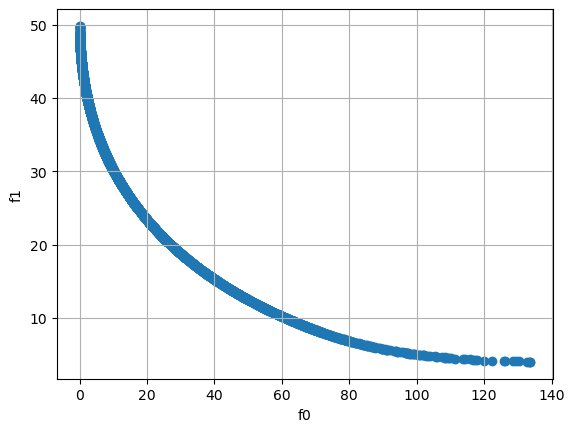

In [10]:
opt.plotfront(pruned)